In [25]:
import numpy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline

In [26]:
L = 1.0
nx = 51
dx = L / (nx - 1)
x = numpy.linspace(0.0, L, num=nx)

alpha = 1.22e-3

T0 = numpy.zeros(nx)
T0[0] = 100.0

In [47]:
def solve_1d(T0, nt, dt, dx, alpha, cI, cE, bc):
    T = T0.copy()
    N = len(T0) - 2
    A, b_bc = lhs_operator(N, dt, dx, alpha, cI, bc)
    for n in range(nt):
        b = rhs_vector(T, dt, dx, alpha, cE)
        T[1:-1] = linalg.solve(A, b - b_bc)
        update_boundaries(T, dx, bc)
    return T

In [28]:
def lhs_operator(N, dt, dx, alpha, cI, bc):
    I = numpy.identity(N)
    L, b_bc = laplacian_1D(N, dx, bc) #returns the del^2 and boundry conditions thing
    A = I / dt - cI * alpha * L # I and L are matricies so A will also be a matrix of the same size
    return A, b_bc

In [29]:
def laplacian_1D(N, dx, bc):
    D = numpy.diag(-2.0 / dx**2 * numpy.ones(N))
    L = numpy.diag( 1.0 / dx**2 * numpy.ones(N - 1), k=-1) # k=-1 means we are filling the lower diagonal
    U = numpy.diag( 1.0 / dx**2 * numpy.ones(N - 1), k=+1) # k=+1 means we are filling the upper diagonal
    A = D + U + L
    b_bc = numpy.zeros(N)
    # Left boundary
    if bc['left']['type'] == 'Dirichlet':
        b_bc[0] = bc['left']['value'] / dx**2
    elif bc['left']['type'] == 'Neumann':
        A[0,0] = -1.0 / dx**2 
        b_bc[0] = bc['left']['value'] / dx
    # Right boundary
    if bc['right']['type'] == 'Dirichlet':
        b_bc[-1] = bc['right']['value'] / dx**2
    elif bc['right']['type'] == 'Neumann':
        A[-1, -1] = -1.0 / dx**2 
        b_bc[-1] = bc['right']['value'] / dx
    return L, b_bc

In [30]:
# dictionary, uses curly brackets! mapping between a key and a value
bc_left = {'type': 'Dirichlet', 'value': 100.0}
bc_right = {'type': 'Neumann', 'value': 0.0}
bc = {'left': bc_left, 'right': bc_right}
#print(bc['left']['type'])

In [31]:
def rhs_vector(T, dt, dx, alpha, cE):
    b = T[1:-1] / dt + cE * alpha * (T[:-2] - 2*T[1:-1] + T[2:]) / dx**2
    return b

In [32]:
def update_boundaries(T, dx, bc):
    # Left
    T[0] = get_boundary_value(T[1], dx, bc['left'])
    T[-1] = get_boundary_value(T[-2], dx, bc['right'])
    return

In [33]:
def get_boundary_value(T_neighbor, dx, bc):
    if bc['type'] == 'Dirichlet':
        return bc['value']
    elif bc['type'] == 'Neumann':
        return T_neighbor + bc['value'] * dx
    else:
        raise ValueError('Only Dirichlet and Neumann are Supported')
    return 

In [34]:
# It works! (at least one of them anyway)
Tb = get_boundary_value(100.0, 1.0, {'type': 'Neumann', 'value': 0.0})
Tb

100.0

In [35]:
# modification in place!
def func(a):
    a[0] += 2.0
    return

a = numpy.ones(3)
print(a)
func(a)
print(a)

[1. 1. 1.]
[3. 1. 1.]


In [48]:
sigma = 0.5
dt = sigma * dx**2 / alpha
nt = 100

T = solve_1d(T0, nt, dt, dx, alpha, 0.5, 0.5, bc)

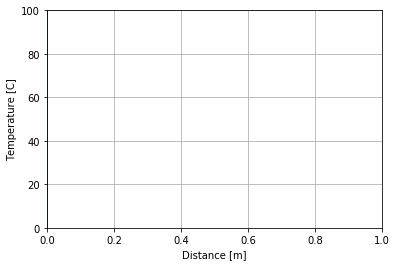

In [49]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

Find the errors in the above code! Fun times right

Also check slack for the correct notebook with the rest of the lesson in it too 